In [ ]:
import yfinance as yf
import pandas as pd
import os

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving n50.csv to n50.csv


In [ ]:
if os.path.exists("n50.csv"):
    n50 = pd.read_csv("n50.csv", index_col=0)
else:
    n50 = yf.Ticker("^NSEI")
    n50 = nfty50.history(period="max")
    n50.to_csv("n50.csv")

In [ ]:
n50.index = pd.to_datetime(n50.index)

In [ ]:
n50

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...
2024-02-14,21578.150391,21870.849609,21530.199219,21840.050781,21840.050781,359100.0
2024-02-15,21906.550781,21953.849609,21794.800781,21910.750000,21910.750000,345400.0
2024-02-16,22020.300781,22068.650391,21968.949219,22040.699219,22040.699219,343900.0


<Axes: xlabel='Date'>

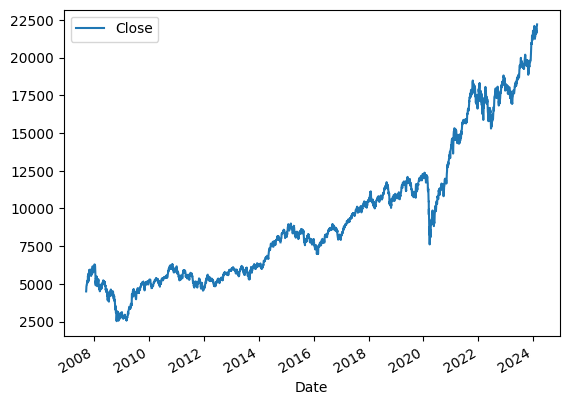

In [ ]:
n50.plot.line(y="Close", use_index=True)

In [ ]:
del n50["Adj Close"]

In [ ]:
n50["Tomorrow"] = n50["Close"].shift(-1)

In [ ]:
n50["Target"] = (n50["Tomorrow"] > n50["Close"]).astype(int)

In [ ]:
n50

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0.0,4546.200195,1
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.0,4732.350098,1
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0,4747.549805,1
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0,4837.549805,1
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0,4932.200195,1
...,...,...,...,...,...,...,...
2024-02-14,21578.150391,21870.849609,21530.199219,21840.050781,359100.0,21910.750000,1
2024-02-15,21906.550781,21953.849609,21794.800781,21910.750000,345400.0,22040.699219,1
2024-02-16,22020.300781,22068.650391,21968.949219,22040.699219,343900.0,22122.250000,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = n50.iloc[:-100]
test = n50.iloc[-100:]
train.dropna(inplace=True)
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

<ipython-input-48-328456facfcf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)


RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [ ]:
preds = pd.Series(preds , index=test.index)

In [ ]:
preds

Date
2023-09-25    1
2023-09-26    1
2023-09-27    1
2023-09-28    1
2023-09-29    1
             ..
2024-02-14    1
2024-02-15    1
2024-02-16    1
2024-02-19    1
2024-02-20    1
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"], preds)

0.59

<Axes: xlabel='Date'>

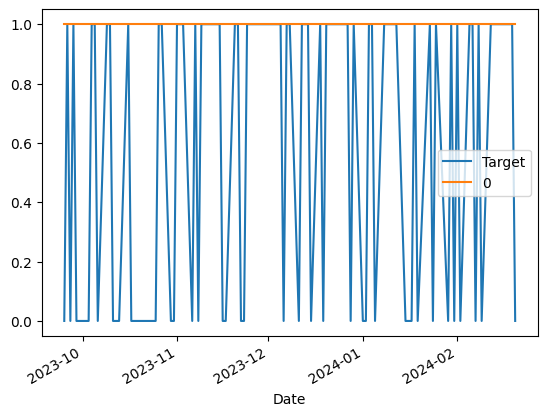

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2520, step=252):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
n50[n50.isnull().any(axis=1)]

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,


In [ ]:
n50.dropna(inplace=True)

In [ ]:
n50

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0.0,4546.200195,1
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.0,4732.350098,1
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0,4747.549805,1
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0,4837.549805,1
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0,4932.200195,1
...,...,...,...,...,...,...,...
2024-02-13,21664.300781,21766.800781,21543.349609,21743.250000,365800.0,21840.050781,1
2024-02-14,21578.150391,21870.849609,21530.199219,21840.050781,359100.0,21910.750000,1
2024-02-15,21906.550781,21953.849609,21794.800781,21910.750000,345400.0,22040.699219,1


In [ ]:
predictions = backtest(n50, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0    973
1    503
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5467196819085487

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.549458
0    0.450542
Name: Target, dtype: float64

#ADDING ADDITIONAL PARAMETERS (PREDICTOR COLUMNS)

In [ ]:
horizons = [2,5,20,252,1260]
new_predictors = []

for horizon in horizons:
    rolling_averages = n50.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    n50[ratio_column] = n50["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    n50[trend_column] = n50.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
n50

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_20,Trend_20,Close_Ratio_252,Trend_252,Close_Ratio_1260,Trend_1260
Date,,,,,,,,,,,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0.0,4546.200195,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0.0,4732.350098,1,1.005702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0.0,4747.549805,1,1.020062,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0.0,4837.549805,1,1.001603,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0.0,4932.200195,1,1.009390,2.0,1.035510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-13,21664.300781,21766.800781,21543.349609,21743.250000,365800.0,21840.050781,1,1.002934,1.0,0.999320,3.0,1.002317,10.0,1.125472,149.0,1.437947,693.0
2024-02-14,21578.150391,21870.849609,21530.199219,21840.050781,359100.0,21910.750000,1,1.002221,2.0,1.004604,3.0,1.007377,10.0,1.129557,149.0,1.443512,693.0
2024-02-15,21906.550781,21953.849609,21794.800781,21910.750000,345400.0,22040.699219,1,1.001616,2.0,1.006072,4.0,1.010921,11.0,1.132250,150.0,1.447331,694.0


In [ ]:
n50 = n50.dropna(subset=n50.columns[n50.columns != "Tomorrow"])

In [ ]:
n50

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_20,Trend_20,Close_Ratio_252,Trend_252,Close_Ratio_1260,Trend_1260
Date,,,,,,,,,,,,,,,,,
2012-12-06,5926.299805,5942.549805,5838.899902,5930.899902,0.0,5907.399902,0,1.002569,2.0,1.006211,4.0,1.036073,13.0,1.128278,136.0,1.197776,649.0
2012-12-07,5934.000000,5949.850098,5888.649902,5907.399902,0.0,5908.899902,1,0.998015,1.0,1.001288,3.0,1.030139,12.0,1.123284,135.0,1.192770,648.0
2012-12-10,5916.049805,5919.950195,5888.100098,5908.899902,0.0,5898.799805,0,1.000127,1.0,1.000256,4.0,1.028746,12.0,1.122986,136.0,1.192848,648.0
2012-12-11,5923.799805,5965.149902,5865.450195,5898.799805,0.0,5888.000000,0,0.999145,1.0,0.998223,3.0,1.025749,11.0,1.120450,136.0,1.190589,647.0
2012-12-12,5917.799805,5924.600098,5874.250000,5888.000000,0.0,5851.500000,0,0.999084,0.0,0.996817,2.0,1.022544,11.0,1.117775,136.0,1.188210,646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-13,21664.300781,21766.800781,21543.349609,21743.250000,365800.0,21840.050781,1,1.002934,1.0,0.999320,3.0,1.002317,10.0,1.125472,149.0,1.437947,693.0
2024-02-14,21578.150391,21870.849609,21530.199219,21840.050781,359100.0,21910.750000,1,1.002221,2.0,1.004604,3.0,1.007377,10.0,1.129557,149.0,1.443512,693.0
2024-02-15,21906.550781,21953.849609,21794.800781,21910.750000,345400.0,22040.699219,1,1.001616,2.0,1.006072,4.0,1.010921,11.0,1.132250,150.0,1.447331,694.0


#MODEL IMPROVEMENT

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(n50, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    188
1.0     28
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6071428571428571

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.625
0    0.375
Name: Target, dtype: float64

In [ ]:
predictions

,Target,Predictions
Date,,
2023-04-05,1,1.0
2023-04-06,1,0.0
2023-04-10,1,0.0
2023-04-11,1,0.0
2023-04-12,1,0.0
...,...,...
2024-02-13,1,0.0
2024-02-14,1,0.0
2024-02-15,1,0.0
